<a href="https://colab.research.google.com/github/Lakshyyaa/hevylearning/blob/master/21ucs115_breastcancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
!pip install ucimlrepo
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [79]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_original.data.features
Y = breast_cancer_wisconsin_original.data.targets

In [80]:
# variable information
print(breast_cancer_wisconsin_original.variables)

                           name     role         type demographic  \
0            Sample_code_number       ID  Categorical        None   
1               Clump_thickness  Feature      Integer        None   
2       Uniformity_of_cell_size  Feature      Integer        None   
3      Uniformity_of_cell_shape  Feature      Integer        None   
4             Marginal_adhesion  Feature      Integer        None   
5   Single_epithelial_cell_size  Feature      Integer        None   
6                   Bare_nuclei  Feature      Integer        None   
7               Bland_chromatin  Feature      Integer        None   
8               Normal_nucleoli  Feature      Integer        None   
9                       Mitoses  Feature      Integer        None   
10                        Class   Target       Binary        None   

                  description units missing_values  
0                        None  None             no  
1                        None  None             no  
2           

In [81]:
# metadata
print(breast_cancer_wisconsin_original.metadata)

{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

In [82]:
X.shape

(699, 9)

In [83]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_of_cell_size      699 non-null    int64  
 2   Uniformity_of_cell_shape     699 non-null    int64  
 3   Marginal_adhesion            699 non-null    int64  
 4   Single_epithelial_cell_size  699 non-null    int64  
 5   Bare_nuclei                  683 non-null    float64
 6   Bland_chromatin              699 non-null    int64  
 7   Normal_nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 49.3 KB


In [84]:
X.describe()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
count,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [85]:
X.head()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1


In [86]:
df = pd.concat([X, Y], axis=1)
df.isnull().sum()

Clump_thickness                 0
Uniformity_of_cell_size         0
Uniformity_of_cell_shape        0
Marginal_adhesion               0
Single_epithelial_cell_size     0
Bare_nuclei                    16
Bland_chromatin                 0
Normal_nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [87]:
df=df.dropna()

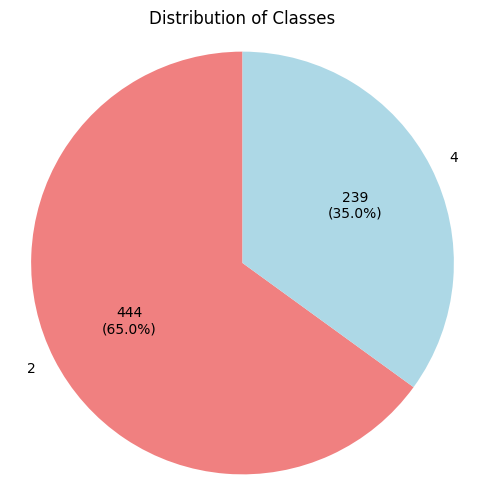

In [88]:
class_distribution = df['Class'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(class_distribution, labels=class_distribution.index, autopct=lambda p: '{:.0f}\n({:.1f}%)'.format(p * sum(class_distribution) / 100, p), startangle=90, colors=['lightcoral', 'lightblue'])
plt.title('Distribution of Classes')
plt.axis('equal')

# Show the pie chart
plt.show()

<Figure size 1000x1000 with 0 Axes>

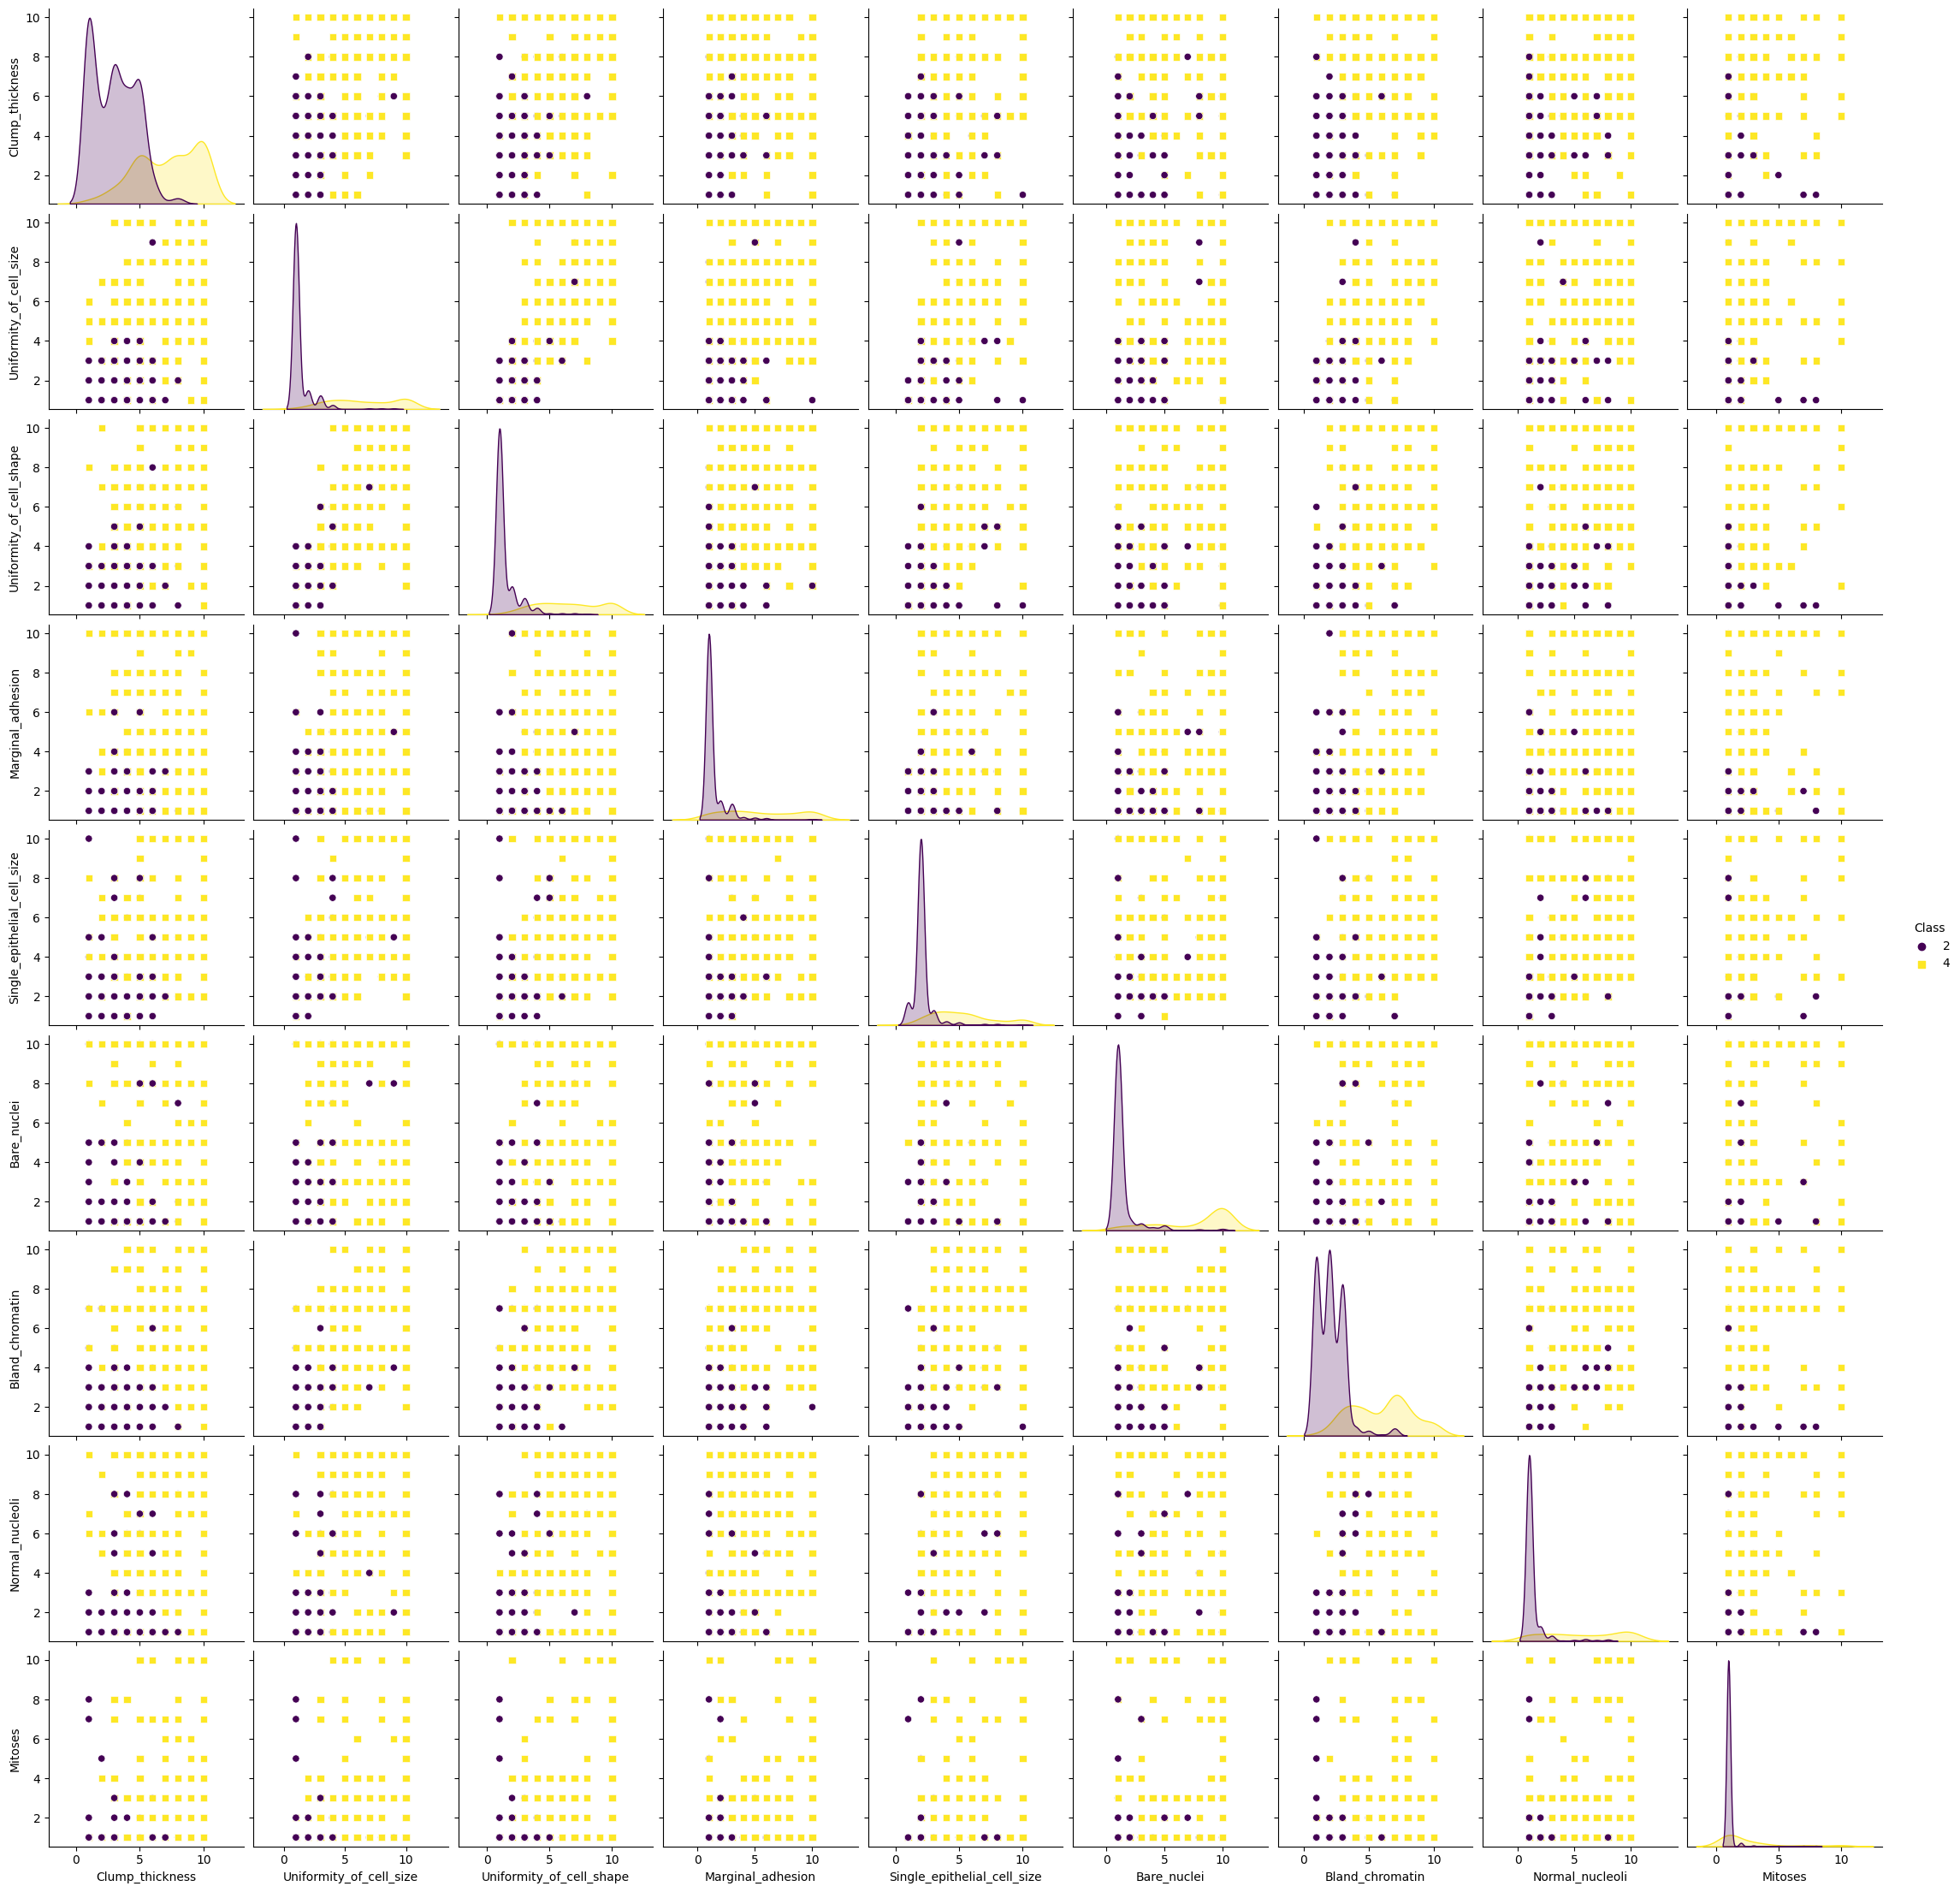

In [89]:
plt.figure(figsize=(10, 10))
sns.pairplot(df, hue='Class', palette='viridis', markers=['o', 's'])
plt.show()

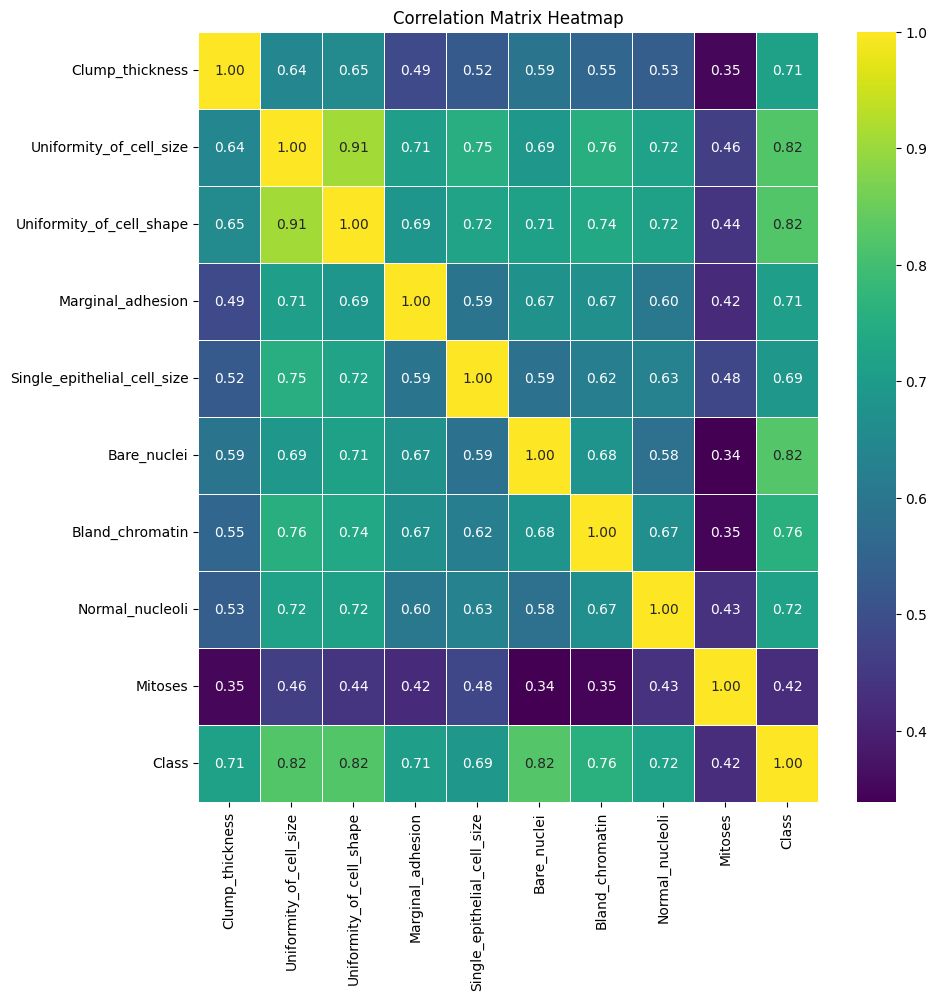

In [90]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()
# shows all are related to class but mitoses is least, we can drop this collumn later to avoid useless collumns, do we?

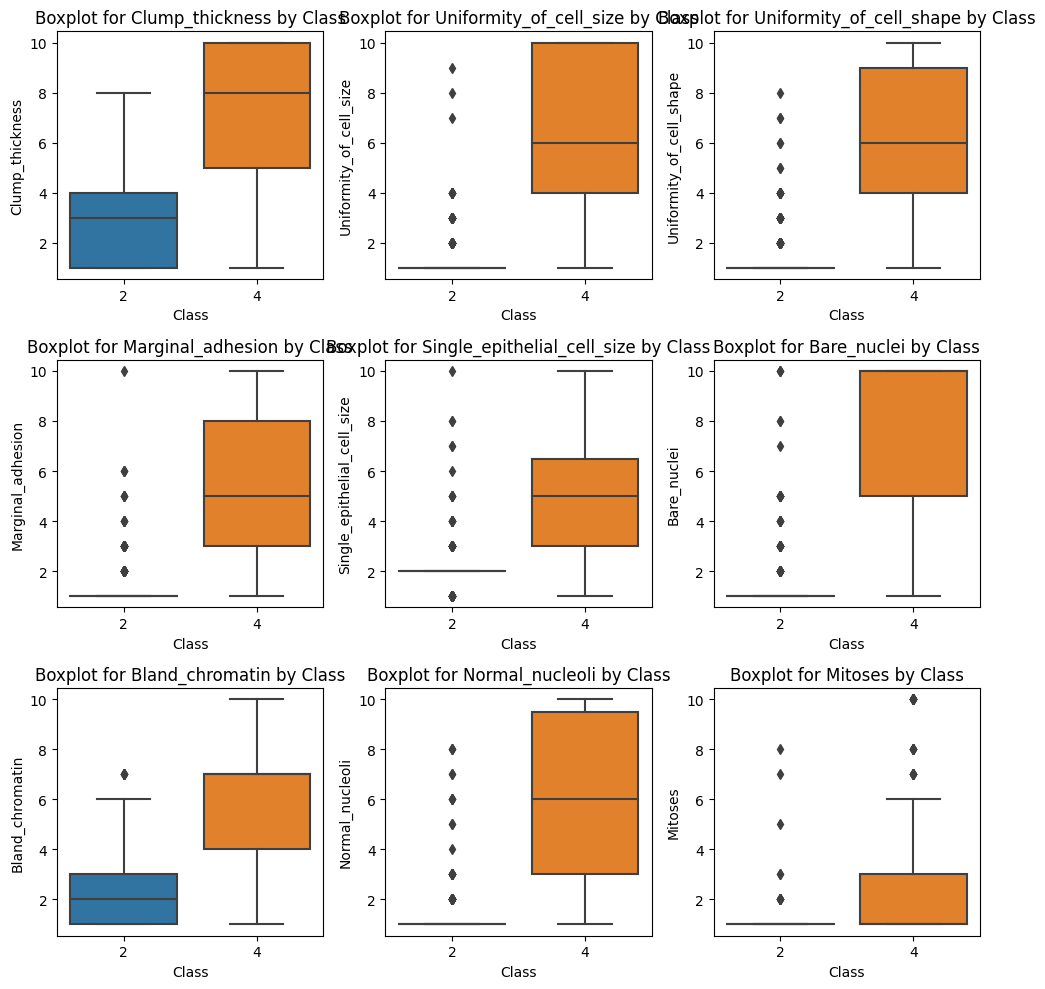

In [91]:
# numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# # Create a MinMaxScaler
# scaler = MinMaxScaler()

# # Fit and transform the selected columns
# df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# # Display the normalized DataFrame
# print(df.head())
plt.figure(figsize=(10, 10))
for i in range(1, 10):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Class', y=df[df.columns[i-1]], data=df)
    plt.title(f'Boxplot for {df.columns[i-1]} by Class')

plt.tight_layout()
plt.show()
# shows what? maybe variation in how the members of class1 and class2 vary and have different properties: outliers of one class seem to be
# members of the other class.

In [92]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create a MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the normalized DataFrame
print(df)

     Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  \
0           0.444444                 0.000000                  0.000000   
1           0.444444                 0.333333                  0.333333   
2           0.222222                 0.000000                  0.000000   
3           0.555556                 0.777778                  0.777778   
4           0.333333                 0.000000                  0.000000   
..               ...                      ...                       ...   
694         0.222222                 0.000000                  0.000000   
695         0.111111                 0.000000                  0.000000   
696         0.444444                 1.000000                  1.000000   
697         0.333333                 0.777778                  0.555556   
698         0.333333                 0.777778                  0.777778   

     Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  \
0             0.000000         

<Figure size 1200x1200 with 0 Axes>

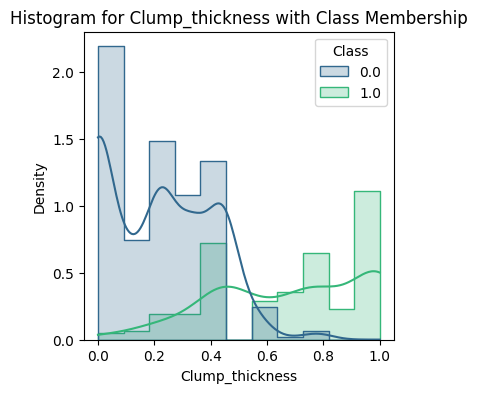

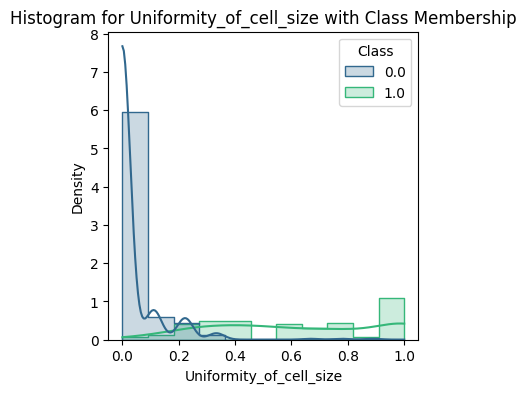

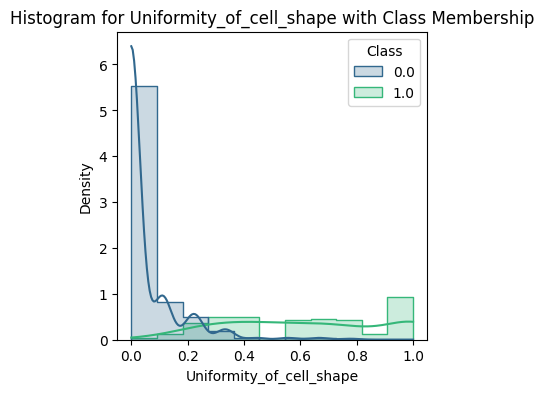

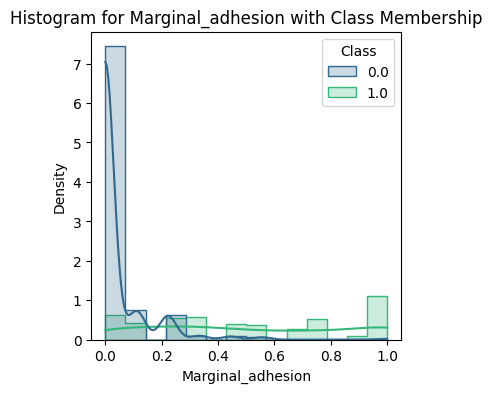

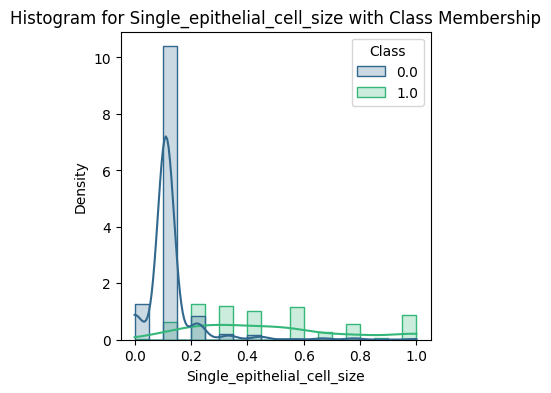

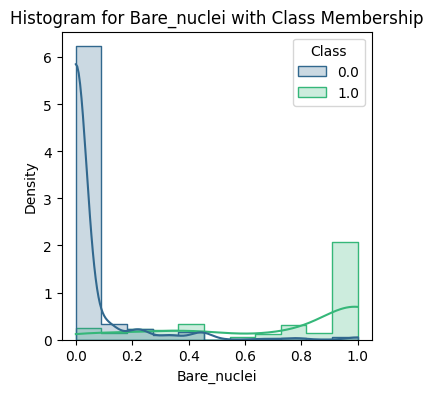

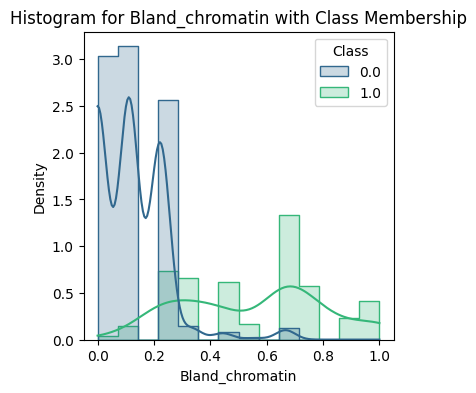

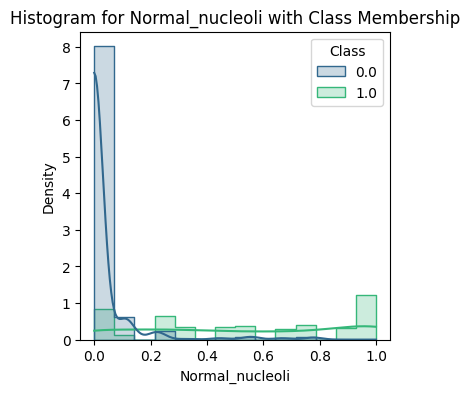

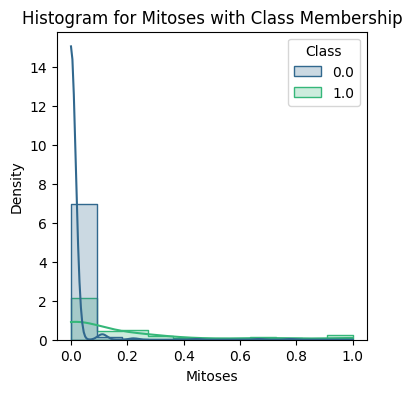

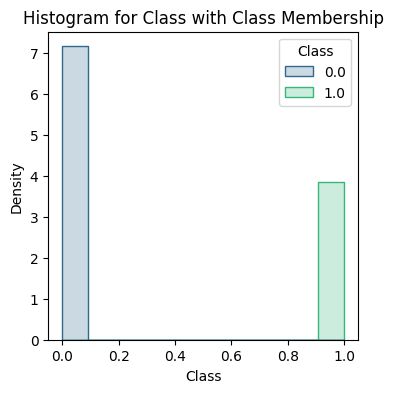

<Figure size 640x480 with 0 Axes>

In [93]:
plt.figure(figsize=(12, 12))

# Loop through numerical columns and create histograms with class membership
for column in numerical_columns:
    plt.figure(figsize=(4, 4))
    sns.histplot(data=df, x=column, hue='Class', kde=True, palette='viridis', element='step', stat='density')
    plt.title(f'Histogram for {column} with Class Membership')
    plt.show()

plt.suptitle('Histograms of Features with Class Membership')
plt.show()
# the data may look skewed but on close inspection we see that the data is on right scale and normalized, the difference appears
# due to how much the variations in members of each class is there, the left side of the graphs represent the members of class 1

In [94]:
X = df.drop('Class', axis=1)  # Features
Y = df['Class']  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=6)

# Display the shapes of the resulting sets
print("Training set - Features:", X_train.shape, "Labels:", Y_train.shape)
print("Testing set - Features:", X_test.shape, "Labels:", Y_test.shape)# splitting training v testing data, 20% is testing data

Training set - Features: (546, 9) Labels: (546,)
Testing set - Features: (137, 9) Labels: (137,)


In [95]:
X_test.shape

(137, 9)

In [96]:
X_train.shape

(546, 9)

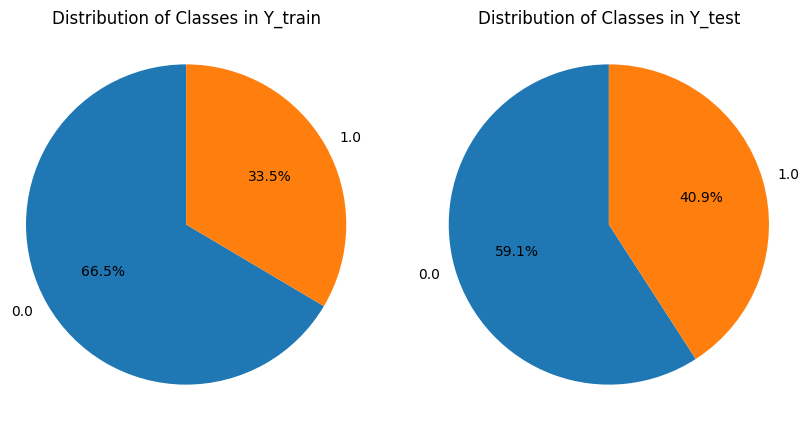

In [97]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Distribution of Classes in Y_train')
plt.pie(Y_train.value_counts(), labels=Y_train.value_counts().index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Pie chart for Y_test
plt.subplot(1, 2, 2)
plt.title('Distribution of Classes in Y_test')
plt.pie(Y_test.value_counts(), labels=Y_test.value_counts().index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [98]:
accuracyd={}
fscored={}
precisiond={}
recalld={}

Confusion Matrix:
 [[80  1]
 [ 2 54]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.99      0.98        81
         1.0       0.98      0.96      0.97        56

    accuracy                           0.98       137
   macro avg       0.98      0.98      0.98       137
weighted avg       0.98      0.98      0.98       137



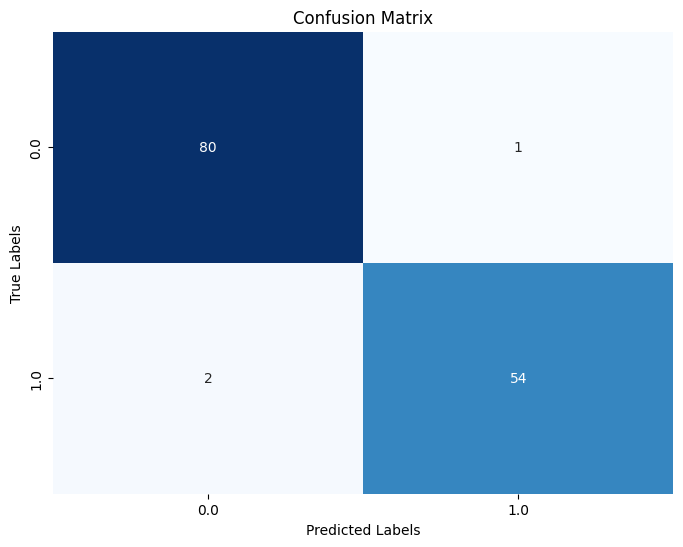

Logistic Regression Precision: 0.9781475067570847
Logistic Regression Recall: 0.9781021897810219
Logistic Regression F1 Score: 0.9780707221932425
Logistic Regression Accuracy: 0.9781021897810219


In [99]:
model = LogisticRegression(random_state=42)

# Train the model on the training set
model.fit(X_train, Y_train)

# Predictions on the testing set
Y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

# Display the results
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_rep)

# Draw heatmap for TP, TN, FP, FN
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
precision = precision_score(Y_test, Y_pred, average='weighted')
recall = recall_score(Y_test, Y_pred, average='weighted')
fscore = f1_score(Y_test, Y_pred, average='weighted')

# Display precision, recall, and fscore for Decision Tree
print("Logistic Regression Precision:", precision)
print("Logistic Regression Recall:", recall)
print("Logistic Regression F1 Score:", fscore)
print("Logistic Regression Accuracy:", accuracy)
algo="Logistic Regression"
accuracyd[algo]=accuracy
fscored[algo]=fscore
precisiond[algo]=precision
recalld[algo]=recall

SVM Confusion Matrix:
 [[79  2]
 [ 1 55]]
SVM Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.98        81
         1.0       0.96      0.98      0.97        56

    accuracy                           0.98       137
   macro avg       0.98      0.98      0.98       137
weighted avg       0.98      0.98      0.98       137



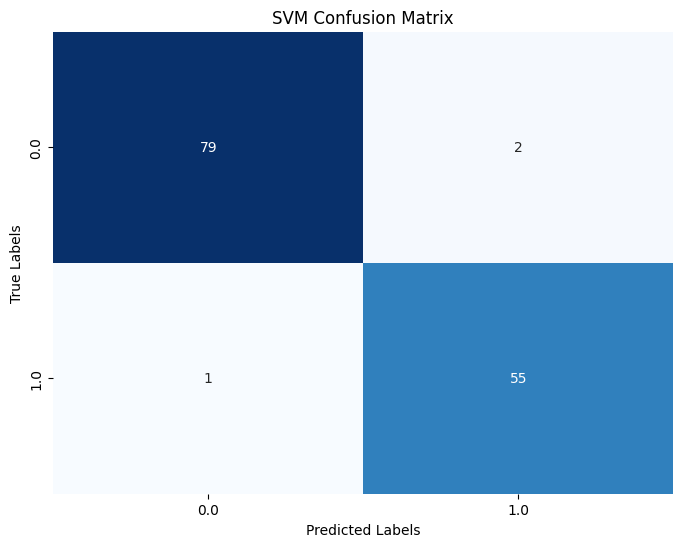

SVM Precision: 0.9782670636445129
SVM Recall: 0.9781021897810219
SVM F1 Score: 0.9781310771247944
SVM Accuracy: 0.9781021897810219


In [100]:
model_svm = SVC(kernel='linear', random_state=42)

# Train the SVM model on the training set
model_svm.fit(X_train, Y_train)

# Predictions on the testing set
Y_pred_svm = model_svm.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(Y_test, Y_pred_svm)
conf_matrix_svm = confusion_matrix(Y_test, Y_pred_svm)
classification_rep_svm = classification_report(Y_test, Y_pred_svm)

# Display the results for SVM
print("SVM Confusion Matrix:\n", conf_matrix_svm)
print("SVM Classification Report:\n", classification_rep_svm)

# Draw heatmap for TP, TN, FP, FN for SVM
conf_matrix_svm = confusion_matrix(Y_test, Y_pred_svm)

# Display the confusion matrix for SVM using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=model_svm.classes_, yticklabels=model_svm.classes_)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
precision_svm = precision_score(Y_test, Y_pred_svm, average='weighted')
recall_svm = recall_score(Y_test, Y_pred_svm, average='weighted')
fscore_svm = f1_score(Y_test, Y_pred_svm, average='weighted')

# Display precision, recall, and fscore for Decision Tree
print("SVM Precision:", precision_svm)
print("SVM Recall:", recall_svm)
print("SVM F1 Score:", fscore_svm)
print("SVM Accuracy:", accuracy_svm)
algo="SVM"
accuracyd[algo]=accuracy_svm
fscored[algo]=fscore_svm
precisiond[algo]=precision_svm
recalld[algo]=recall_svm

Naive Bayes Confusion Matrix:
 [[77  4]
 [ 2 54]]
Naive Bayes Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.95      0.96        81
         1.0       0.93      0.96      0.95        56

    accuracy                           0.96       137
   macro avg       0.95      0.96      0.95       137
weighted avg       0.96      0.96      0.96       137



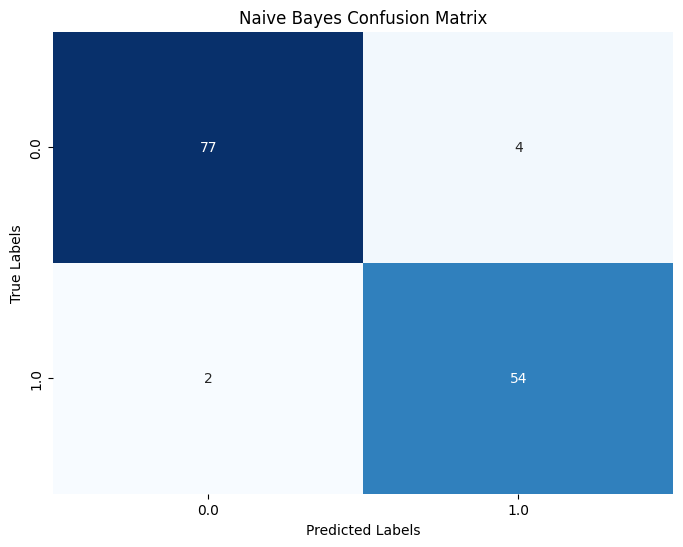

Naive Bayes Precision: 0.9568415921393455
Naive Bayes Recall: 0.9562043795620438
Naive Bayes F1 Score: 0.9563148290434115
Naive Bayes Accuracy: 0.9562043795620438


In [101]:
model_nb = GaussianNB()

# Train the Naive Bayes model on the training set
model_nb.fit(X_train, Y_train)

# Predictions on the testing set
Y_pred_nb = model_nb.predict(X_test)

# Evaluate the Naive Bayes model
accuracy_nb = accuracy_score(Y_test, Y_pred_nb)
conf_matrix_nb = confusion_matrix(Y_test, Y_pred_nb)
classification_rep_nb = classification_report(Y_test, Y_pred_nb)

# Display the results for Naive Bayes
print("Naive Bayes Confusion Matrix:\n", conf_matrix_nb)
print("Naive Bayes Classification Report:\n", classification_rep_nb)

# Draw heatmap for TP, TN, FP, FN for Naive Bayes
conf_matrix_nb = confusion_matrix(Y_test, Y_pred_nb)

# Display the confusion matrix for Naive Bayes using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=model_nb.classes_, yticklabels=model_nb.classes_)
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
precision_nb = precision_score(Y_test, Y_pred_nb, average='weighted')
recall_nb = recall_score(Y_test, Y_pred_nb, average='weighted')
fscore_nb = f1_score(Y_test, Y_pred_nb, average='weighted')

# Display precision, recall, and fscore for Decision Tree
print("Naive Bayes Precision:", precision_nb)
print("Naive Bayes Recall:", recall_nb)
print("Naive Bayes F1 Score:", fscore_nb)
print("Naive Bayes Accuracy:", accuracy_nb)
algo="Naive Bayes"
accuracyd[algo]=accuracy_nb
fscored[algo]=fscore_nb
precisiond[algo]=precision_nb
recalld[algo]=recall_nb

Random Forest Confusion Matrix:
 [[79  2]
 [ 0 56]]
Random Forest Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        81
         1.0       0.97      1.00      0.98        56

    accuracy                           0.99       137
   macro avg       0.98      0.99      0.98       137
weighted avg       0.99      0.99      0.99       137



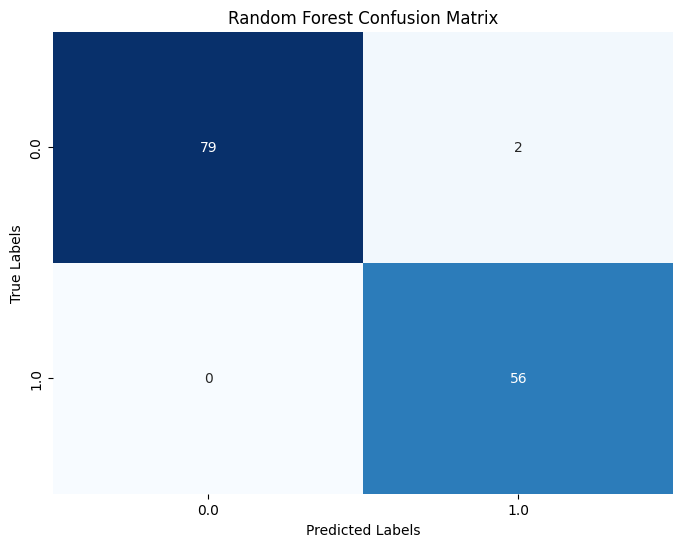

Random Forest Precision: 0.9859048577900832
Random Forest Recall: 0.9854014598540146
Random Forest F1 Score: 0.9854382763478037
Random Forest Accuracy: 0.9854014598540146


In [102]:
# Create a Random Forest classifier
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest model on the training set
model_rf.fit(X_train, Y_train)

# Predictions on the testing set
Y_pred_rf = model_rf.predict(X_test)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
conf_matrix_rf = confusion_matrix(Y_test, Y_pred_rf)
classification_rep_rf = classification_report(Y_test, Y_pred_rf)

# Display the results for Random Forest
print("Random Forest Confusion Matrix:\n", conf_matrix_rf)
print("Random Forest Classification Report:\n", classification_rep_rf)

# Draw heatmap for TP, TN, FP, FN for Random Forest
conf_matrix_rf = confusion_matrix(Y_test, Y_pred_rf)

# Display the confusion matrix for Random Forest using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=model_rf.classes_, yticklabels=model_rf.classes_)
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
precision_rf = precision_score(Y_test, Y_pred_rf, average='weighted')
recall_rf = recall_score(Y_test, Y_pred_rf, average='weighted')
fscore_rf = f1_score(Y_test, Y_pred_rf, average='weighted')

# Display precision, recall, and fscore for Decision Tree
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1 Score:", fscore_rf)
print("Random Forest Accuracy:", accuracy_rf)
algo="Random Forest"
accuracyd[algo]=accuracy_rf
fscored[algo]=fscore_rf
precisiond[algo]=precision_rf
recalld[algo]=recall_rf

KNN Confusion Matrix:
 [[80  1]
 [ 3 53]]
KNN Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.98        81
         1.0       0.98      0.95      0.96        56

    accuracy                           0.97       137
   macro avg       0.97      0.97      0.97       137
weighted avg       0.97      0.97      0.97       137



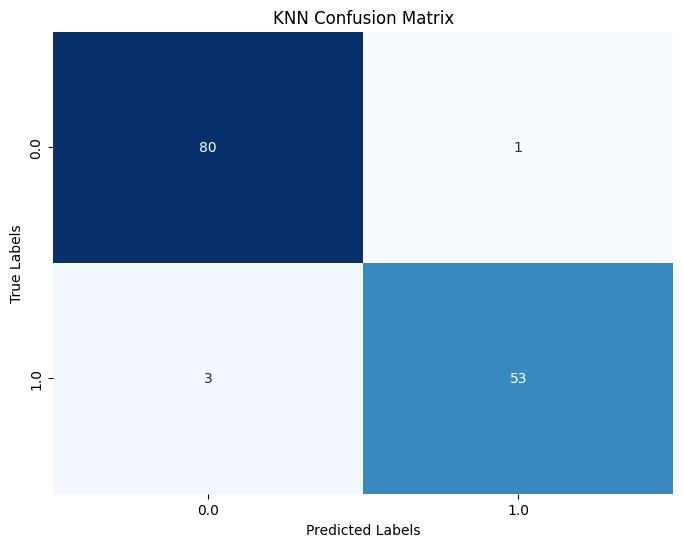

KNN Precision: 0.9710602344495582
KNN Recall: 0.9708029197080292
KNN F1 Score: 0.9707155226827648
KNN Accuracy:  0.9708029197080292


In [103]:
# Create a KNN classifier
model_knn = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model on the training set
model_knn.fit(X_train, Y_train)

# Predictions on the testing set
Y_pred_knn = model_knn.predict(X_test)

# Evaluate the KNN model
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
conf_matrix_knn = confusion_matrix(Y_test, Y_pred_knn)
classification_rep_knn = classification_report(Y_test, Y_pred_knn)

# Display the results for KNN
print("KNN Confusion Matrix:\n", conf_matrix_knn)
print("KNN Classification Report:\n", classification_rep_knn)

# Draw heatmap for TP, TN, FP, FN for KNN
conf_matrix_knn = confusion_matrix(Y_test, Y_pred_knn)

# Display the confusion matrix for KNN using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=model_knn.classes_, yticklabels=model_knn.classes_)
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
precision_knn = precision_score(Y_test, Y_pred_knn, average='weighted')
recall_knn = recall_score(Y_test, Y_pred_knn, average='weighted')
fscore_knn = f1_score(Y_test, Y_pred_knn, average='weighted')

# Display precision, recall, and fscore for Decision Tree
print("KNN Precision:", precision_knn)
print("KNN Recall:", recall_knn)
print("KNN F1 Score:", fscore_knn)
print("KNN Accuracy: ", accuracy_knn)
algo="KNN"
accuracyd[algo]=accuracy_knn
fscored[algo]=fscore_knn
precisiond[algo]=precision_knn
recalld[algo]=recall_knn

Decision Tree Confusion Matrix:
 [[77  4]
 [ 4 52]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        81
         1.0       0.93      0.93      0.93        56

    accuracy                           0.94       137
   macro avg       0.94      0.94      0.94       137
weighted avg       0.94      0.94      0.94       137



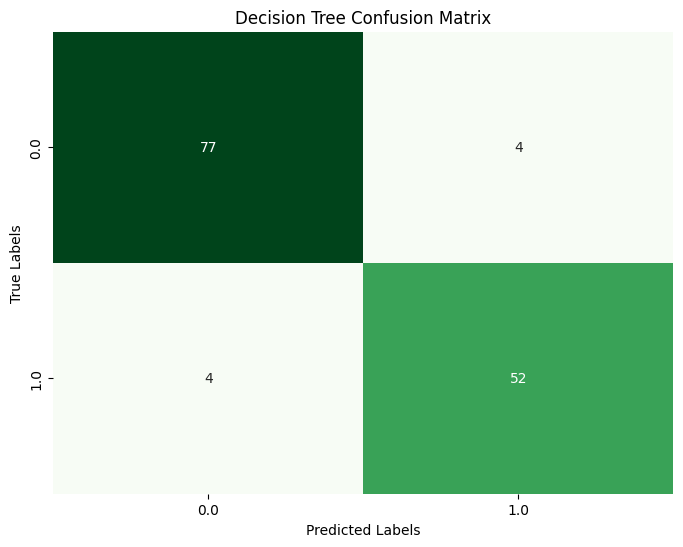

Decision Tree Precision: 0.9416058394160584
Decision Tree Recall: 0.9416058394160584
Decision Tree F1 Score: 0.9416058394160584
Decision Tree Accuracy:  0.9416058394160584


In [104]:
# Create a Decision Tree classifier
model_decision_tree = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model on the training set
model_decision_tree.fit(X_train, Y_train)

# Predictions on the testing set
Y_pred_decision_tree = model_decision_tree.predict(X_test)

# Evaluate the Decision Tree model
accuracy_decision_tree = accuracy_score(Y_test, Y_pred_decision_tree)
conf_matrix_decision_tree = confusion_matrix(Y_test, Y_pred_decision_tree)
classification_rep_decision_tree = classification_report(Y_test, Y_pred_decision_tree)

# Display the results for Decision Tree
print("Decision Tree Confusion Matrix:\n", conf_matrix_decision_tree)
print("Decision Tree Classification Report:\n", classification_rep_decision_tree)

# Draw heatmap for TP, TN, FP, FN for Decision Tree
conf_matrix_decision_tree = confusion_matrix(Y_test, Y_pred_decision_tree)

# Display the confusion matrix for Decision Tree using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_decision_tree, annot=True, fmt="d", cmap="Greens", cbar=False,
            xticklabels=model_decision_tree.classes_, yticklabels=model_decision_tree.classes_)
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
precision_decision_tree = precision_score(Y_test, Y_pred_decision_tree, average='weighted')
recall_decision_tree = recall_score(Y_test, Y_pred_decision_tree, average='weighted')
fscore_decision_tree = f1_score(Y_test, Y_pred_decision_tree, average='weighted')

# Display precision, recall, and fscore for Decision Tree
print("Decision Tree Precision:", precision_decision_tree)
print("Decision Tree Recall:", recall_decision_tree)
print("Decision Tree F1 Score:", fscore_decision_tree)
print("Decision Tree Accuracy: ", accuracy_decision_tree)
algo="Decision Tree"
accuracyd[algo]=accuracy_decision_tree
fscored[algo]=fscore_decision_tree
precisiond[algo]=precision_decision_tree
recalld[algo]=recall_decision_tree

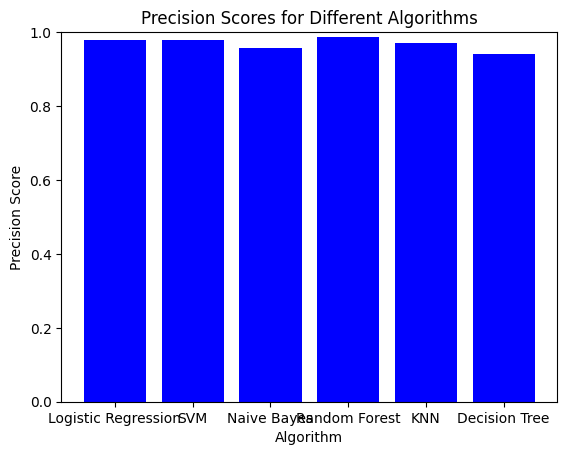

In [105]:
algorithm_names = list(precisiond.keys())
precision_scores = list(precisiond.values())

# Plot histograms
plt.bar(algorithm_names, precision_scores, color='blue')
plt.xlabel('Algorithm')
plt.ylabel('Precision Score')
plt.title('Precision Scores for Different Algorithms')
plt.ylim(0, 1)  # Set the y-axis limits to match precision score range (0 to 1)
plt.show()

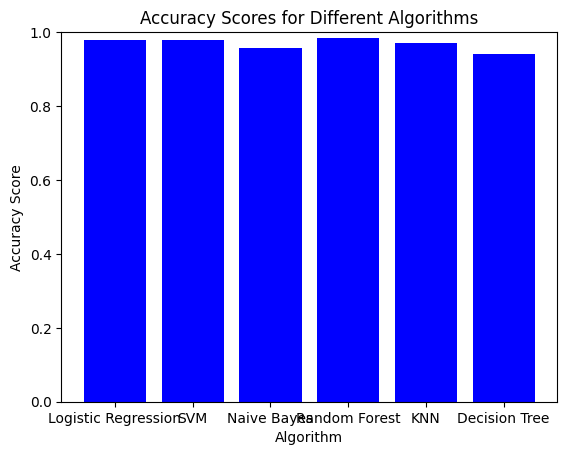

In [107]:
algorithm_names = list(accuracyd.keys())
accuracy_scores = list(accuracyd.values())

# Plot histograms
plt.bar(algorithm_names, accuracy_scores, color='blue')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Different Algorithms')
plt.ylim(0, 1)  # Set the y-axis limits to match precision score range (0 to 1)
plt.show()

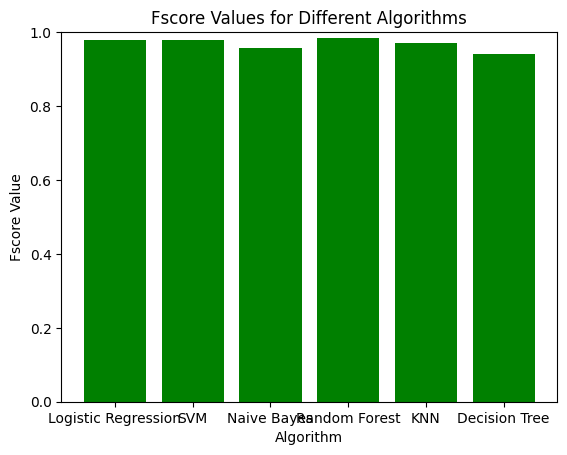

In [108]:
algorithm_names = list(fscored.keys())
fscore_values = list(fscored.values())

# Plot histograms for fscore
plt.bar(algorithm_names, fscore_values, color='green')  # You can change the color if needed
plt.xlabel('Algorithm')
plt.ylabel('Fscore Value')
plt.title('Fscore Values for Different Algorithms')
plt.ylim(0, 1)  # Set the y-axis limits to match fscore range (0 to 1)
plt.show()


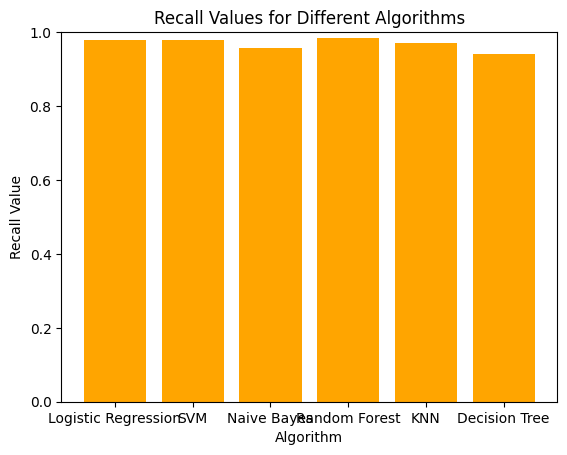

In [109]:
algorithm_names = list(recalld.keys())
recall_values = list(recalld.values())

# Plot histograms for recall
plt.bar(algorithm_names, recall_values, color='orange')  # You can change the color if needed
plt.xlabel('Algorithm')
plt.ylabel('Recall Value')
plt.title('Recall Values for Different Algorithms')
plt.ylim(0, 1)  # Set the y-axis limits to match recall range (0 to 1)
plt.show()


In [ ]:
# on comparing we observe : write conclusion